# Продвинутый функционал в Pandas. Визуализация данных.
## Анализ пользователей, лояльности пользователей
___
### 3.1.1 [Роль аналитика в команде](https://www.youtube.com/watch?v=eYdHyHG8KJA&t=10s&ab_channel=AnatoliyKarpov)

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [65]:
df = pd.read_csv('data_set/lesson_3_data.csv', encoding='windows-1251')

In [66]:
df.head(3)

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta


___
### 3.1.2 [Переподготовка данных](https://www.youtube.com/watch?v=bMqBjhChfYE&ab_channel=AnatoliyKarpov)
>Необходимо выяснить самых лояльных клиентов чтобы можно было им выдать скидочные карты.
Для этого выберем в отдельный датафрейм поле
> **tc** - id клиентов
> **art_sp** - покупаемые товары этих клиентов

In [67]:
user_df = df[['tc','art_sp']]

In [68]:
user_df.head

<bound method NDFrame.head of                tc                              art_sp
0       110000761  MARAVILLA        500 G Store_Brand
1       110000761  FIDEO CABELLIN   500 G Store_Brand
2        28491841        SPAGUETTI Nє 5 500 G Brand_1
3        95931501       FIDEO FIDEUБ      500 Brand_7
4        93265591      MACARRONES  GRATINAR 5 Brand_2
...           ...                                 ...
48124    45518841      FIDEOS 0         500 G Brand_4
48125   110824211      PLUMAS 3         500 G Brand_4
48126  1408670389  MACARRONES       500 G Store_Brand
48127  1408670389  SPAGHETTI        500 G Store_Brand
48128    48582221  SPAGHETTINI      500 G Store_Brand

[48129 rows x 2 columns]>

>Переименуем колонки для лучшего восприятия и проверим результат

In [69]:
user_df = user_df.rename(columns={'tc':'user_id', 'art_sp': 'brand_info'})

In [70]:
user_df.head(1)

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand


### 3.1.3 [Метод Apply для трансформации колонок](https://www.youtube.com/watch?v=v7g6mhGWQjA&t=1s&ab_channel=AnatoliyKarpov)
>Нужно из колонки brand_info достать название брендов.
Воспользуемся методом **split**, для того чтобы разделить строки по пробелам.

In [71]:
brand_name = 'MARAVILLA 500 G Store_Brand' #пример строки в переменной для сплитования строки

In [72]:
brand_name.split(' ')[-1] # с конца берем последнее слово

'Store_Brand'

> Теперь создадим функцию для изменения данных в колонке **brand_info**

In [73]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [74]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [75]:
user_df.head(5)

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


### 3.1.4 [Lambda функции для быстрых вычислений](https://www.youtube.com/watch?v=7mQAkvogvlo&t=2s&ab_channel=AnatoliyKarpov)
>Теперь тоже-самое попробуем сделать с помощью функции lambda более простым способом, используем например для одноразового использования этой функции

In [76]:
user_df.brand_info.apply(lambda x: x.split(' ')[-1])

0        Store_Brand
1        Store_Brand
2            Brand_1
3            Brand_7
4            Brand_2
            ...     
48124        Brand_4
48125        Brand_4
48126    Store_Brand
48127    Store_Brand
48128    Store_Brand
Name: brand_info, Length: 48129, dtype: object

### 3.1.5 [Приступаем к аналитике](https://www.youtube.com/watch?v=7mQAkvogvlo&t=2s&ab_channel=AnatoliyKarpov)
Проверим гипотезу, что покупатель совершивший более 10 покупателей является лояльным клиентом и мы можем дать ему карту покупателя
Посчитаем количесвто пользователей сгруппировав их по user_id и применив функцию count

In [77]:
user_df\
    .groupby('user_id', as_index=False)\
    .agg({'brand_name': 'count'})\
    .rename(columns={'brand_name': 'purchases'}).head(5)

,user_id,purchases
0,-1236394515,1
1,1031,6
2,4241,5
3,17311,2
4,17312,2


Eще один способ подсчета количества пользователей сгруппировав их по **user_id**, применив функцию **.value_counts** и заодно посчитаем медианное значение функцией **.median** '''

In [78]:
user_df.user_id.value_counts().median()

2.0

Здесь просто выведем среднее арифметическое значение функцией **[.mean](https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean)**

In [79]:
user_df.user_id.value_counts().mean()

4.091210472628358

Применим функцию описательной статистики **[.describe](https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.describe.html)**, которая обобщает центральную тенденцию, дисперсия и форма распределение набора данных

In [80]:
user_df.user_id.value_counts().describe()

count    11764.000000
mean         4.091210
std          4.573143
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         60.000000
Name: user_id, dtype: float64

Сохраним нашу выборку в новый дата фрейм **[user_purchases]**

In [83]:
user_purchases = user_df\
    .groupby('user_id', as_index=False)\
    .agg({'brand_name': 'count'})\
    .rename(columns={'brand_name': 'purchases'})

In [84]:
user_purchases.describe()

,user_id,purchases
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


Как мы видим что 75% покупателей сделали до 5 покупок, а значит 25% покупателей сделали более 5 покупок, вот эти покупатели нас и интерисуют.
Давайте в нашу выборку **[user_purchases]** добавим условие

In [85]:
user_purchases = user_df\
    .groupby('user_id', as_index=False)\
    .agg({'brand_name': 'count'})\
    .rename(columns={'brand_name': 'purchases'})\
    .query('purchases >= 5')

Мы получили данные что 50% покупателей делают около 7 покупок

In [86]:
user_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [93]:
user_purchases.head(1)

,user_id,purchases
1,1031,6


Теперь нам нуджно понять, что отобранные пользователи совершили один и тот же бренд или разные бренды они покупали.
Сгруппируем таблицу по колонкам **[user_id]** и **[brand_name]**
Например видим что у одного пользователя было несколько покупок, добавим этого пользователя "1031" в основной запрос

In [88]:
user_df\
    .groupby(['user_id','brand_name'], as_index=False)\
    .agg({'brand_info':'count'})\
    .query('user_id == 1031')

,user_id,brand_name,brand_info
1,1031,Brand_3,1
2,1031,Store_Brand,5


Теперь отберем для каждого пользователя любимые покупки:
- Отсортируем по двум полям чтобы большая покупка внутри пользователчя была первой функцией **.sort_values(['user_id', 'brand_info'], ascending=[False, False])**
- Сгруппируем еще раз по полю функцией **.groupby('user_id')**
- Возьмем по первое поле в сортировке функцией **.head(1)**
- Переименуем агрегированные колонки

Сохраним результат в новый **DataSet > lovely_brand_purchases_df**

In [94]:
lovely_brand_purchases_df = user_df\
    .groupby(['user_id','brand_name'], as_index=False)\
    .agg({'brand_info':'count'})\
    .sort_values(['user_id', 'brand_info'], ascending=[False, False])\
    .groupby('user_id')\
    .head(1)\
    .rename(columns={'brand_name': 'lovely_brand', 'brand_info': 'lovely_brand_purchases'})

In [97]:
lovely_brand_purchases_df.head(5)

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


Теперь для каждого пользователя посчитаем число уникальных брендов.
Рассчитаем их с помощью функции **pd.Series.nunique**

In [100]:
users_unique_brands = user_df\
    .groupby('user_id', as_index=False)\
    .agg({'brand_name': pd.Series.nunique})\
    .rename(columns={'brand_name': 'unique_brands'})

In [101]:
users_unique_brands.head(5)

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


### 3.1.6 [Объединение данных метод **Merge**](https://www.youtube.com/watch?v=Ik6uPSx0MIs&ab_channel=AnatoliyKarpov)
Теперь сведем три датафрейма в единуй датафрейм:
- **user_purchases** - сколько у нас юзеры покупают покупок всего и отобрали только тех кто покупает больше пяти
- **users_unique_brands** - во втором посчитали количество брендов которые покупают эти покупатели
- **lovely_brand_purchases_df** - в третьем посчитали лдля каждого пользователя сколько покупок приходится на их любимый бренд

In [112]:
user_purchases\
    .merge(users_unique_brands, on='user_id')\
    .merge(lovely_brand_purchases_df, on='user_id')

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2
...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5
3379,1408783189,10,2,Store_Brand,8
3380,1408783379,6,2,Brand_1,4
3381,1408798879,8,3,Store_Brand,4


### 3.1.7 [От данных к метрикам](https://www.youtube.com/watch?v=VjS2L5XoSrI&t=5s&ab_channel=AnatoliyKarpov)
Сохраним результат объединенных таблиц в датафрейм

In [104]:
loyalty_df = user_purchases\
    .merge(users_unique_brands, on='user_id')\
    .merge(lovely_brand_purchases_df, on='user_id')

In [105]:
loyalty_df.head(5)

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


Отберем только тех пользователей кто покупает только один бренд, их как раз можно отнести к лояльным пользователям

In [106]:
loyal_users = loyalty_df[loyalty_df.unique_brands ==1]

In [108]:
loyal_users.head(5)

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12


Но есть те пользователи которые покупют большую часть этого бренда по сравнению с другими брендами например больше 75% одного бренда.
И для этого например придумаем свою метрику пользователя, высчитаем процент разделив любимые покупки на общее количество покупок и сохраним результат в тот же датафрейм **loyalty_df** но в новую колонку.

In [110]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [111]:
loyalty_df.head(5)

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


### 3.1.7 [Визуализация как метод исследования данных](https://www.youtube.com/watch?v=ynzSRe48PM4&ab_channel=AnatoliyKarpov)
Для визуализации нам потребуются библиотеки
**[seaborn]** и **[matplotlib]**
Вставим их и импортируем в самом начале
И выведем график по score

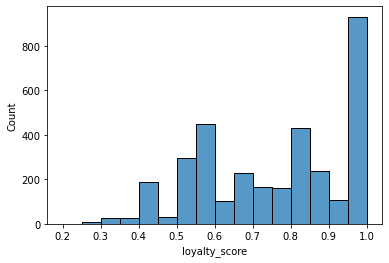

In [117]:
ax = sns.histplot(loyalty_df.loyalty_score)

Посчитаем по бренд найму и посчитаем медианный скор лояльность пользователей этого бренда

In [121]:
brand_loyalty = loyalty_df\
    .groupby('lovely_brand', as_index=False)\
    .agg({'loyalty_score': 'median', 'user_id': 'count'})

brand_loyalty.head(5)

,lovely_brand,loyalty_score,user_id
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
2,Brand_3,0.500000,115
3,Brand_4,0.818182,2041
4,Brand_5,0.600000,5


Теперь выведем данные на графике чтобы визуально можно было оценить любимые бренды

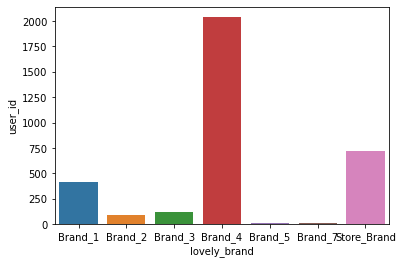

In [122]:
ax = sns.barplot(x='lovely_brand', y='user_id', data=brand_loyalty)